# Data Analysis Interview Challenge

## Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

##### Import libraries and files

In [278]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


In [279]:
# Read json file
df = pd.read_json('logins.json').set_index('login_time')
df

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21
...
1970-04-13 18:50:19
1970-04-13 18:43:56
1970-04-13 18:54:02


In [280]:
#Check date column properties, etc. 
df.index

DatetimeIndex(['1970-01-01 20:13:18', '1970-01-01 20:16:10',
               '1970-01-01 20:16:37', '1970-01-01 20:16:36',
               '1970-01-01 20:26:21', '1970-01-01 20:21:41',
               '1970-01-01 20:12:16', '1970-01-01 20:35:47',
               '1970-01-01 20:35:38', '1970-01-01 20:47:52',
               ...
               '1970-04-13 18:36:53', '1970-04-13 18:40:31',
               '1970-04-13 18:46:06', '1970-04-13 18:40:40',
               '1970-04-13 18:48:52', '1970-04-13 18:50:19',
               '1970-04-13 18:43:56', '1970-04-13 18:54:02',
               '1970-04-13 18:57:38', '1970-04-13 18:54:23'],
              dtype='datetime64[ns]', name='login_time', length=93142, freq=None)

In [281]:
# Add a counter column

df.index = pd.to_datetime(df.index)
df['logged'] = 1

Check for days with less than 24 hours and exclude those records

In [282]:
# Check if each daily record is complete - have 24 hours per day

df_hourly = df.resample('H').count()
daily_hour_count = df_hourly.groupby(df_hourly.index.date)['logged'].agg({'count', 'sum'})
daily_hour_count['count'].value_counts()

count
24    101
4       1
19      1
Name: count, dtype: int64

In [283]:
# Get days with incomplete hours

dates_inc_hrs = daily_hour_count[daily_hour_count['count'] < 24]
dates_inc_hrs.index

Index([1970-01-01, 1970-04-13], dtype='object')

In [284]:
# Remove rows with dates in incomplete_days

dates_comp_hrs = ~pd.Series(df.index.date, index=df.index).isin(dates_inc_hrs.index)
df = df[dates_comp_hrs]
df.shape

(92635, 1)

### Quarter-Hour (15 min intervals)

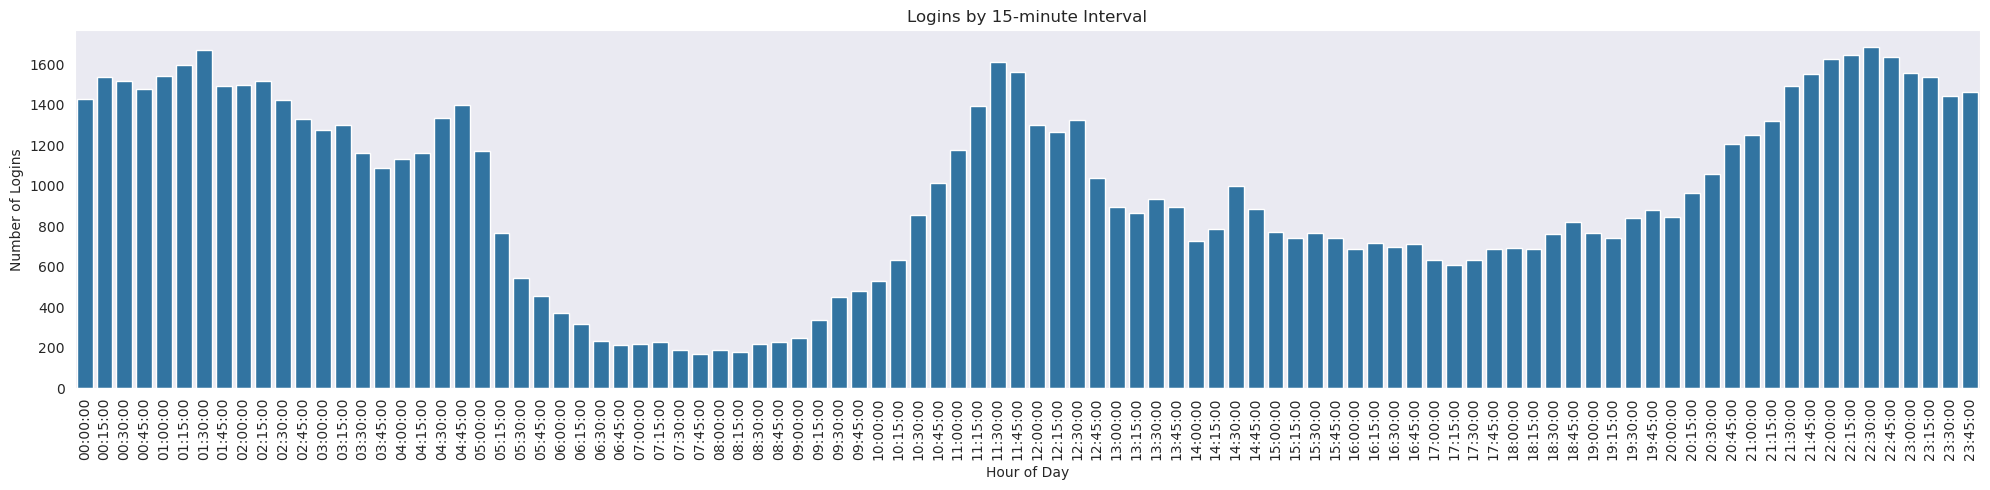

In [285]:
# Count total logins by quarter hour

logins_by_quarter = df.groupby(df.index.floor('15min').time).sum()

# PLot logins by quarter hour

plt.figure(figsize=(20, 5))
sns.set_style('dark', {'axes.grid': False})
sns.barplot(x=logins_by_quarter.index,
            y=logins_by_quarter['logged'] )
plt.title('Logins by 15-minute Interval')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Resample data by quarterhourly (15 min interval)

In [286]:
# Quarter hourly logins

logins_quarterhourly = df.resample('15min').count()

In [287]:
# Verify datetime index 

logins_quarterhourly.index

DatetimeIndex(['1970-01-02 00:00:00', '1970-01-02 00:15:00',
               '1970-01-02 00:30:00', '1970-01-02 00:45:00',
               '1970-01-02 01:00:00', '1970-01-02 01:15:00',
               '1970-01-02 01:30:00', '1970-01-02 01:45:00',
               '1970-01-02 02:00:00', '1970-01-02 02:15:00',
               ...
               '1970-04-12 21:30:00', '1970-04-12 21:45:00',
               '1970-04-12 22:00:00', '1970-04-12 22:15:00',
               '1970-04-12 22:30:00', '1970-04-12 22:45:00',
               '1970-04-12 23:00:00', '1970-04-12 23:15:00',
               '1970-04-12 23:30:00', '1970-04-12 23:45:00'],
              dtype='datetime64[ns]', name='login_time', length=9696, freq='15min')

In [288]:
# Check for nulls 

logins_quarterhourly.isna().sum()

logged    0
dtype: int64

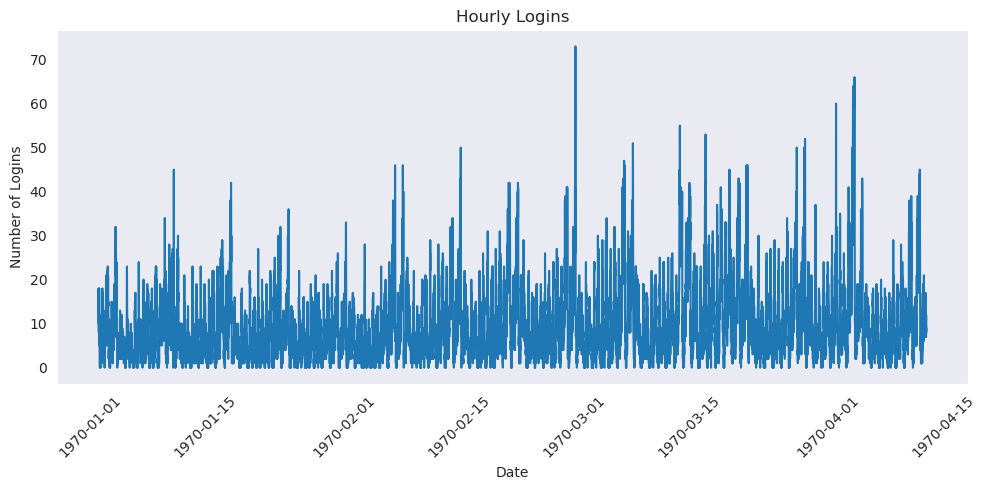

In [289]:
# Plot the quarter-hourly logins

plt.figure(figsize=(10, 5))
sns.lineplot(x=logins_quarterhourly.index, y=logins_quarterhourly['logged'])
plt.title('Hourly Logins')
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Date and Time with the highest logins

In [290]:
print( f'Date and time with the highest logins: {logins_quarterhourly['logged'].idxmax()}' )

Date and time with the highest logins: 1970-03-01 04:30:00


Mean quarterhourly logins

In [291]:
avg_logins_quarterhourly = round(logins_quarterhourly['logged'].mean(),0)
print(f'Average quarterhourly logins : {avg_logins_quarterhourly}' )


Average quarterhourly logins : 10.0


Decompose data and check for seasonality

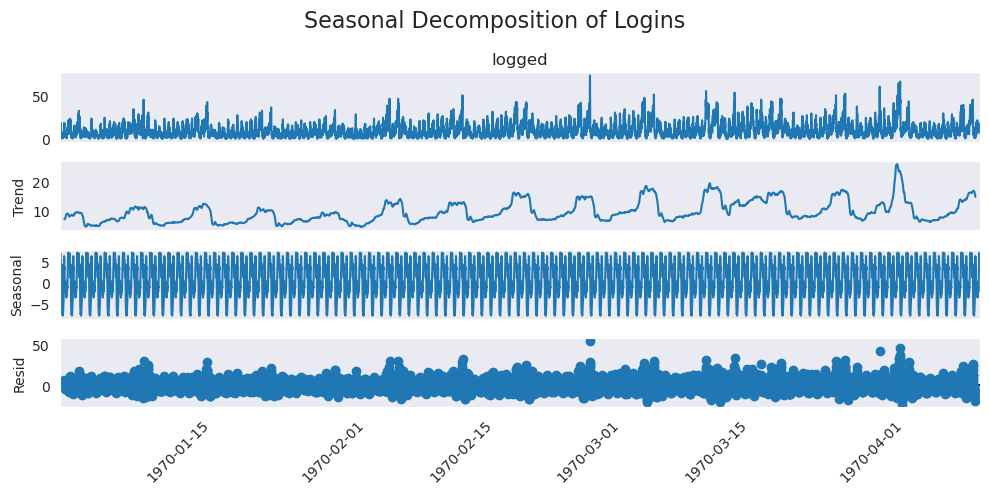

In [250]:
# Seasonal decomposition of quarter hourly logins data

from statsmodels.tsa.seasonal import seasonal_decompose

# use period = 96 quarter hours in a day. 
decomposition = seasonal_decompose(logins_quarterhourly['logged'], model='additive', period=96)
fig = decomposition.plot()
fig.set_size_inches(10, 5)
plt.suptitle('Seasonal Decomposition of Logins', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

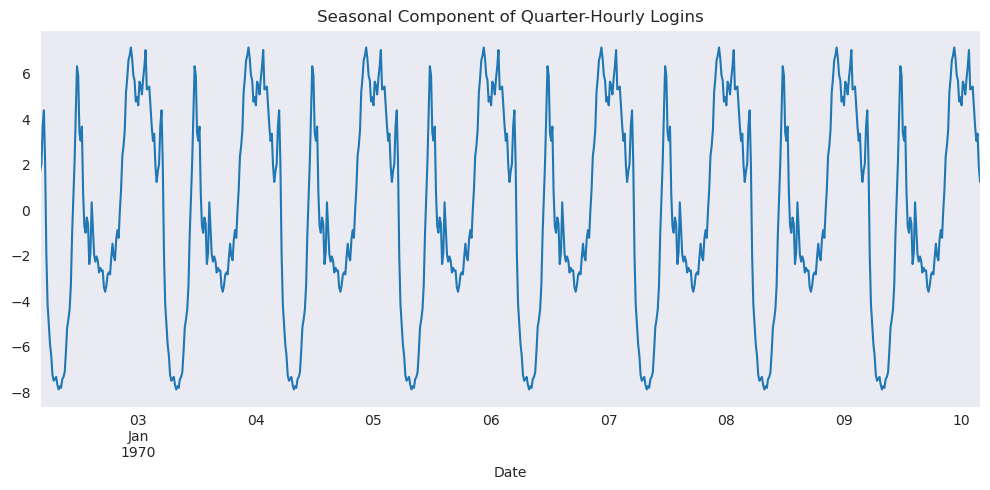

In [251]:
# Zoom in on the seasonal component of the quarter hourly logins within a 7-day period

plt.figure(figsize=(10, 5))
decomposition.seasonal[16:784].plot()
plt.title('Seasonal Component of Quarter-Hourly Logins')
plt.xlabel('Date')
# plt.ylabel('Number of Logins')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Hourly

Resample to data to hourly

Average logins per hour:  38.0


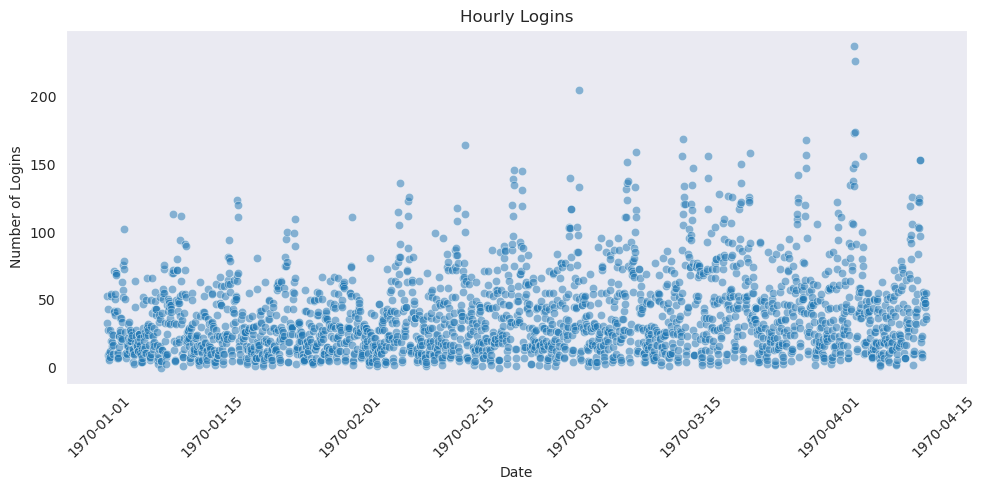

In [252]:
# Resample to hourly - Logins per hour

logins_hourly = df.resample('h').count()

avg_logins_hourly = round(logins_hourly['logged'].mean(),0)
print('Average logins per hour: ', avg_logins_hourly)

# Plot the hourly counts
sns.set_style('dark', {'axes.grid': False})
plt.figure(figsize=(10, 5))
sns.scatterplot(x=logins_hourly.index, y=logins_hourly['logged'], marker='o', alpha=0.5)
plt.title('Hourly Logins')
plt.xlabel('Date')
plt.ylabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Decompose and check for seasonality

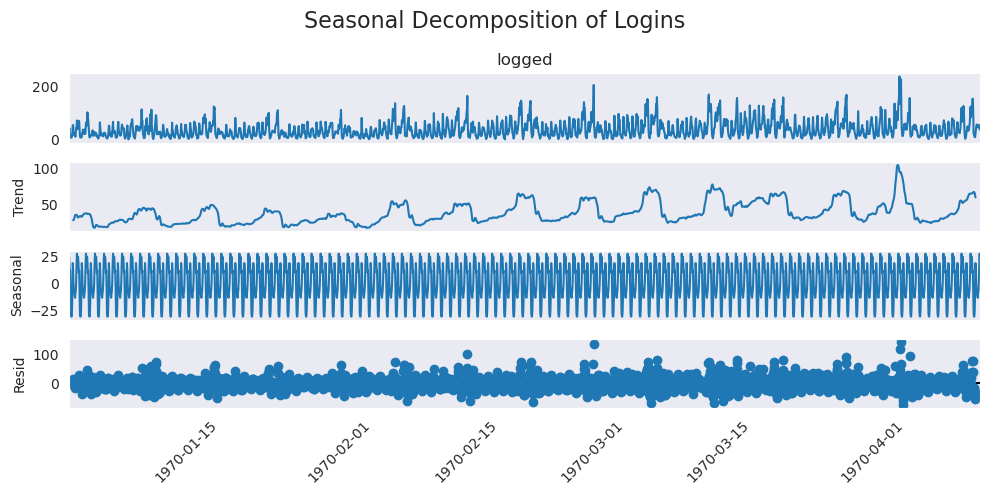

In [253]:
# Seasonal decomposition - Hourly logins

# use period = 24 hours. 
decomposition = seasonal_decompose(logins_hourly['logged'], model='additive', period=24)
fig = decomposition.plot()
fig.set_size_inches(10, 5)
plt.suptitle('Seasonal Decomposition of Logins', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

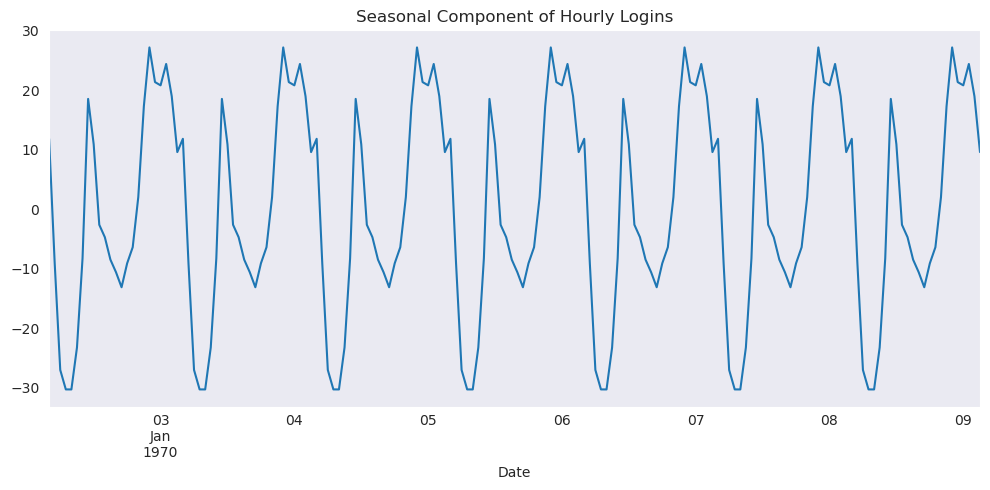

In [254]:
# Zooming in on the seasonal component for a 7-day period

plt.figure(figsize=(10, 5))
decomposition.seasonal[4:172].plot()
plt.title('Seasonal Component of Hourly Logins')
plt.xlabel('Date')
# plt.ylabel('Seasonal Component')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Extract total logins per hour of day

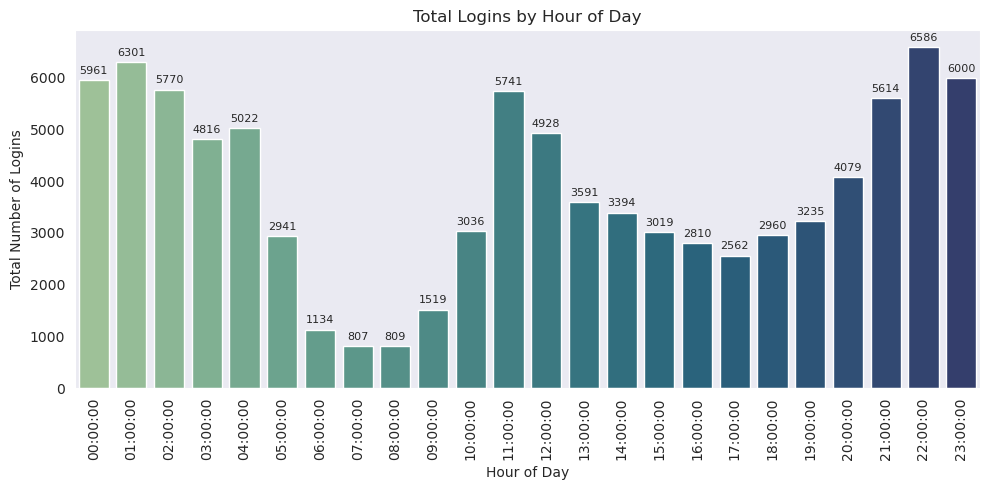

In [255]:
# Total logins by hour

logins_by_hour = logins_hourly.groupby(logins_hourly.index.hour).sum()

# convert index to time

logins_by_hour.index = pd.to_datetime(logins_by_hour.index, format='%H').time

# Logins by hour of day

plt.figure(figsize=(10, 5))
sns.set_style('dark', {'axes.grid': False})
ax = sns.barplot(x=logins_by_hour.index, 
                 y=logins_by_hour['logged'], 
                 palette='crest', 
                 hue=logins_by_hour.index, 
                 legend=False)

plt.title('Total Logins by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Number of Logins')
plt.xticks(rotation=90)


for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=8, padding=3)

plt.tight_layout()
plt.show()


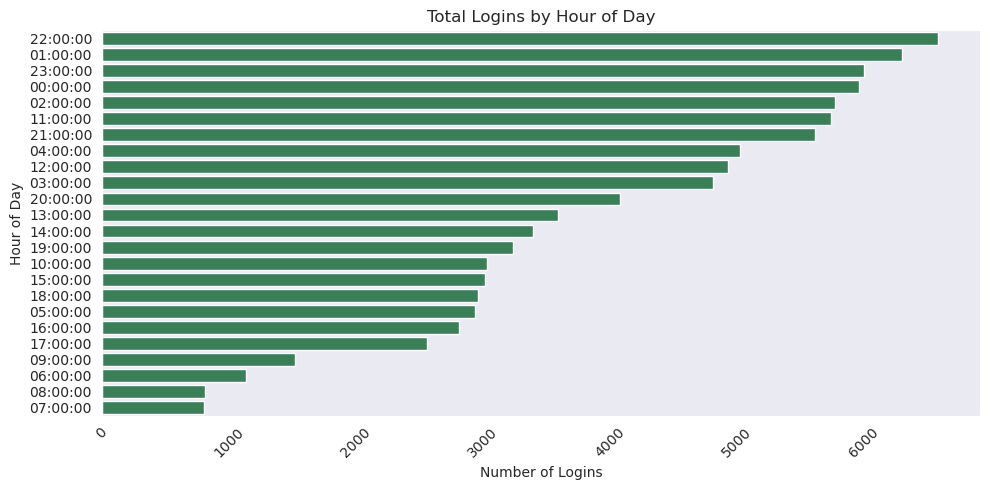

In [256]:
#  Total logins by hour of day - sorted

plt.figure(figsize=(10, 5))
sns.set_style('dark', {'axes.grid': False})
sns.barplot(y=logins_by_hour.sort_values('logged', ascending=False).index,
            x=logins_by_hour.sort_values('logged', ascending=False)['logged'], color='seagreen' )
plt.title('Total Logins by Hour of Day')
plt.ylabel('Hour of Day')
plt.xlabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Get the hours with most logins: 

top5 = logins_by_hour.sort_values('logged', ascending=False).head(5)
top5

,logged
22:00:00,6586
01:00:00,6301
23:00:00,6000
00:00:00,5961
02:00:00,5770


Extract Date and Time to new columns

In [258]:
# Extract Date + Time Variables

logins_hourly['year'] = logins_hourly.index.year
logins_hourly['month'] = logins_hourly.index.month
logins_hourly['day'] = logins_hourly.index.day
logins_hourly['hour'] = logins_hourly.index.hour
logins_hourly['weekday'] = logins_hourly.index.day_name()
logins_hourly['weekday_numeric'] = logins_hourly.index.weekday

# 5 & 6 is for Saturday and Sunday
logins_hourly['is_weekend'] = logins_hourly.index.weekday > 4

#### Visualizing hourly logins by weekday and hour of the day.

##### Plot style #1: Heatmap

In [259]:
# Plot the hourly logins by weekday and hour of the day.

gby_weekday_hour = logins_hourly.groupby([logins_hourly['weekday_numeric'], logins_hourly['hour']])['logged'].agg('sum').reset_index()

In [260]:
# Pivot to get the logins for every hour of the day by weekday

pvt_login_activity = gby_weekday_hour.pivot(index='hour', columns='weekday_numeric', values='logged')
pvt_login_activity.index = pd.to_datetime(pvt_login_activity.index, format='%H').time
pvt_login_activity.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

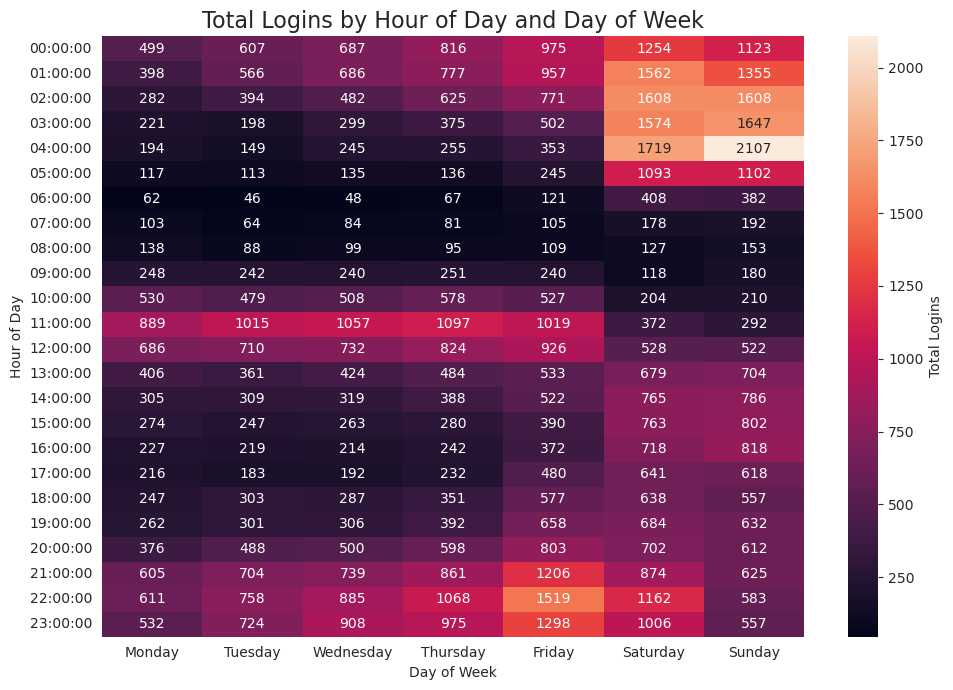

In [276]:
# Visualization #1: Plot by heatmap.

plt.figure(figsize=(10, 7))
sns.heatmap(data=pvt_login_activity, annot=True, fmt='.0f', cbar_kws={'label': 'Total Logins'})
plt.title('Total Logins by Hour of Day and Day of Week', fontsize=16)
plt.ylabel('Hour of Day')
plt.xlabel('Day of Week')
plt.tight_layout()
plt.show()

##### Plot style #2: Barchart

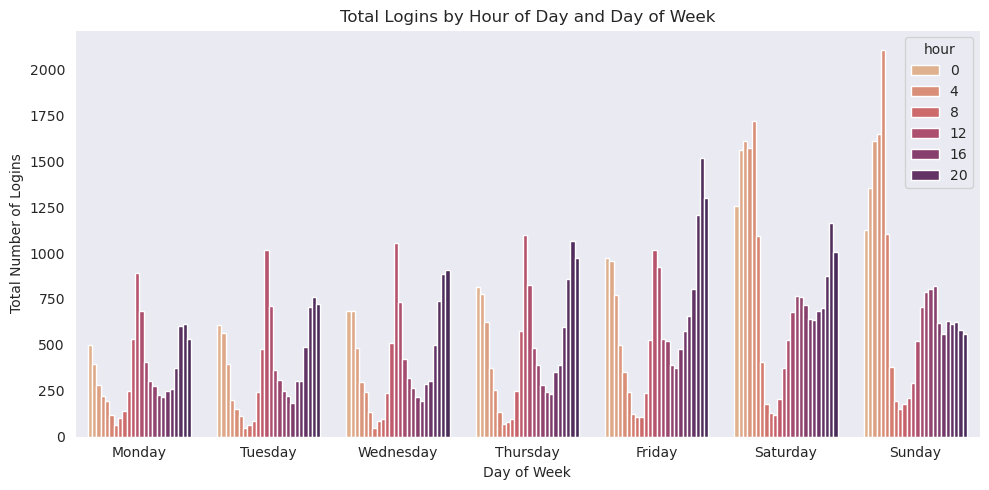

In [262]:
# Plot the hourly logins by weekday and hour of the day.

gby_weekday_hour['weekday'] = gby_weekday_hour['weekday_numeric'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

plt.figure(figsize=(10, 5))
sns.barplot(x=gby_weekday_hour['weekday'], y=gby_weekday_hour['logged'], hue=gby_weekday_hour['hour'], palette='flare')
plt.title('Total Logins by Hour of Day and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Number of Logins')
plt.tight_layout()
plt.show()

### Standard Daily


In [267]:
# Resample to daily

logins_daily = df.resample('D').count()

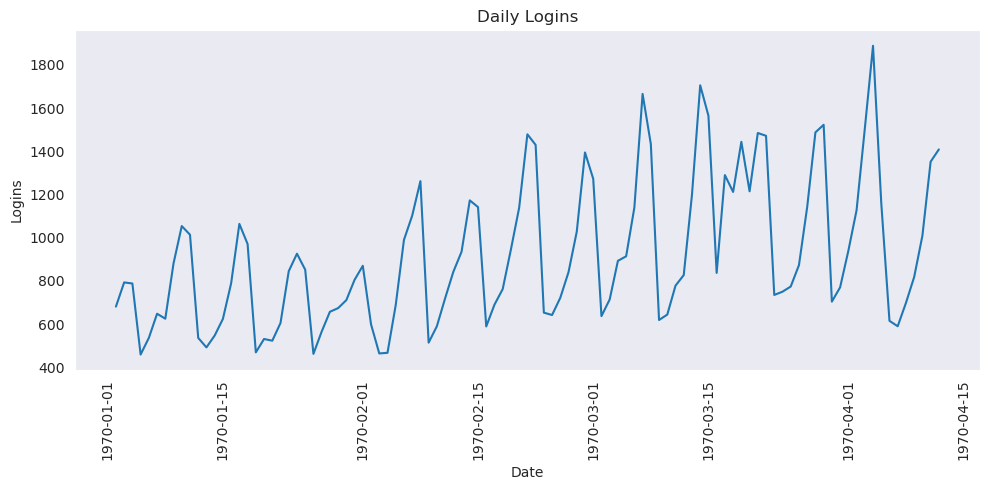

In [268]:
# Plot daily logins

sns.set_style('dark')
plt.figure(figsize=(10, 5))
sns.lineplot(x=logins_daily.index, y=logins_daily['logged'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Logins')
plt.title('Daily Logins')
plt.tight_layout()
plt.show()

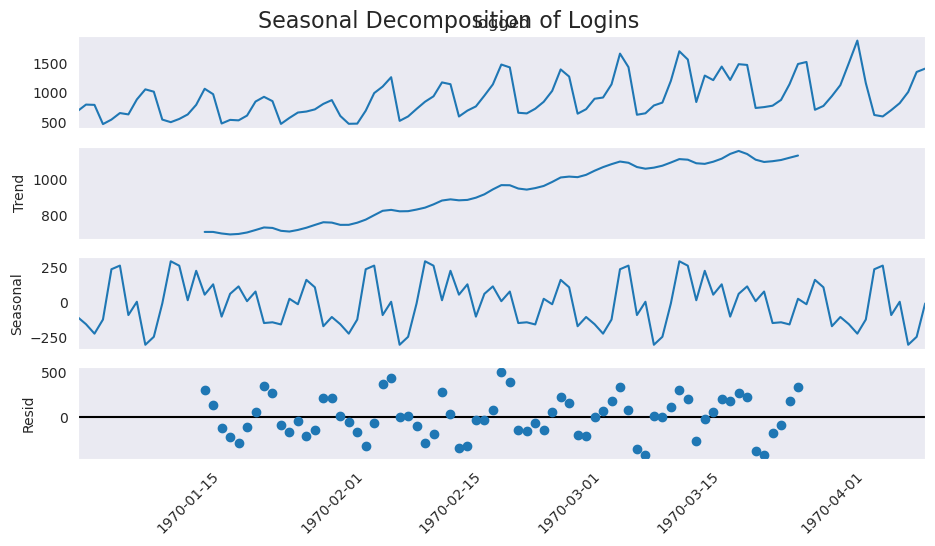

In [269]:
# use period = 30 days. 

decomposition = seasonal_decompose(logins_daily['logged'], model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(10, 5)
plt.suptitle('Seasonal Decomposition of Logins', fontsize=16)
plt.xticks(rotation=45)
plt.show() 

In [270]:
# Extract Time Variables

logins_daily['year'] = logins_daily.index.year
logins_daily['month'] = logins_daily.index.month
logins_daily['day'] = logins_daily.index.day
logins_daily['weekday'] = logins_daily.index.day_name()
logins_daily['weekday_numeric'] = logins_daily.index.weekday


# 5 & 6 is for Saturday and Sunday
logins_daily['is_weekend'] = logins_daily.index.weekday > 4

logins_daily.head(5)

,logged,year,month,day,weekday,weekday_numeric,is_weekend
login_time,,,,,,,
1970-01-02,681,1970,1,2,Friday,4,False
1970-01-03,793,1970,1,3,Saturday,5,True
1970-01-04,788,1970,1,4,Sunday,6,True
1970-01-05,459,1970,1,5,Monday,0,False
1970-01-06,536,1970,1,6,Tuesday,1,False


In [271]:
# Which day of the week has the most logins

logins_by_day = logins_daily.groupby(logins_daily.index.day_name()).sum()
logins_by_day = logins_daily.groupby(['weekday'])['logged'].agg('sum').reset_index()
logins_by_day = logins_by_day.sort_values(by='logged', ascending=False)

In [272]:
avg_logins_daily = round(logins_daily.logged.mean(),0)
print('Average daily logins: ', avg_logins_daily)

Average daily logins:  917.0


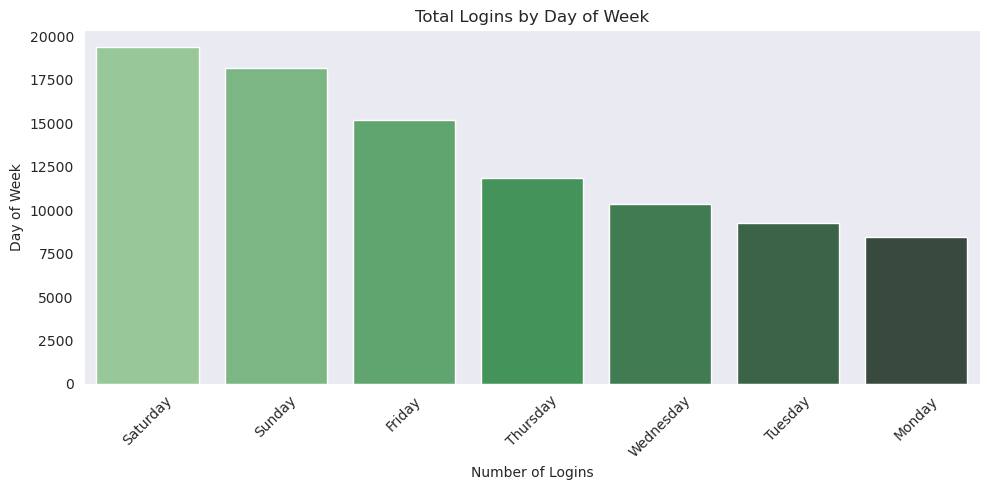

In [273]:
# Plot total logins by day of week

pal = sns.color_palette("Greens_d", len(logins_by_day))
rank = logins_by_day['logged'].argsort().values

plt.figure(figsize=(10, 5))
sns.set_style('dark', {'axes.grid': False})
sns.barplot(x=logins_by_day.weekday,
            y=logins_by_day.logged,
            palette=[pal[::-1][i] for i in rank])
plt.title('Total Logins by Day of Week')
plt.ylabel('Day of Week')
plt.xlabel('Number of Logins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Standard Weekly

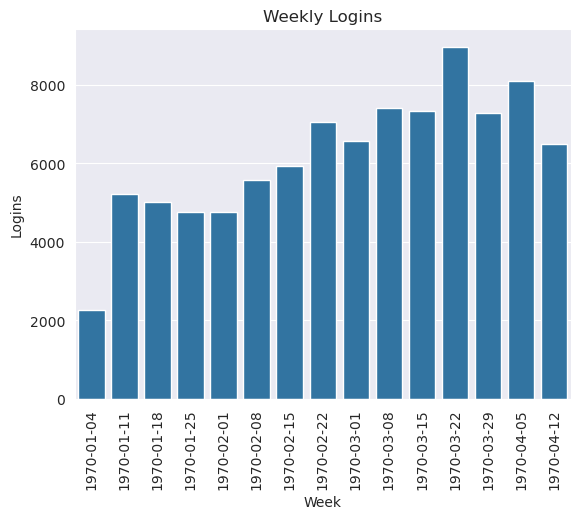

In [274]:
# Resample to weekly

logins_weekly = df.resample('W').count()

# Plot weekly logins

sns.set_style('darkgrid')
sns.barplot(x=logins_weekly.index, y=logins_weekly['logged'])
plt.xticks(rotation=90)
plt.xlabel('Week')
plt.ylabel('Logins')
plt.title('Weekly Logins')
plt.show()

In [275]:
print( f'[Quarter-hourly Basis] Highest number (with {logins_quarterhourly['logged'].max()} in total): {logins_quarterhourly['logged'].idxmax()}' )
print( f'[Hourly Basis] Highest number (with {logins_hourly['logged'].max()} in total): {logins_hourly['logged'].idxmax()}' )
print( f'[Daily Basis] Highest count (with {logins_daily['logged'].max()} in total): {logins_daily['logged'].idxmax()}' )
print( f'[Weekly Basis] Highest count (with {logins_weekly['logged'].max()} in total): {logins_weekly['logged'].idxmax()}' )

[Quarter-hourly Basis] Highest number (with 73 in total): 1970-03-01 04:30:00
[Hourly Basis] Highest number (with 237 in total): 1970-04-04 01:00:00
[Daily Basis] Highest count (with 1889 in total): 1970-04-04 00:00:00
[Weekly Basis] Highest count (with 8955 in total): 1970-03-22 00:00:00


### Summary

<div class="alert alert-block alert-success">

On weekdays, there is a significant spike in daytime logins on weekdays from 11:00 am to 12:00 pm.\
As weekend approaches, the night time logins increase happens from 8:00 pm and peaks just before midnight.\
Friday and Saturday nights are when the most logins, surging to approximately thousands starting at 9:00 pm until 6:00 am the next day and the top login count was registered from 4:00 am to 5:00 am on Sundays

</div>

![Logins_heatmap](./images/total_logins_heatmap.png)

<div class="alert alert-block alert-success">

[Quarter-hourly Basis] Highest number (with 73 in total): 1970-03-01 04:30:00\
[Hourly Basis] Highest number (with 237 in total): 1970-04-04 01:00:00\
[Daily Basis] Highest count (with 1889 in total): 1970-04-04\
[Weekly Basis] Highest count (with 8955 in total): 1970-03-22

Average quarterhourly logins : 10\
Average logins per hour:  38\
Average logins per day:  904

</div>

## Part 2 ‐ Experiment and metrics design 

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. 
On weekends, there is reasonable activity in both cities.However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. \
The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
- a) how you will implement the experiment
- b) what statistical test(s) you will conduct to verify the significance of the observation
- c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.


<div class="alert alert-block alert-success">

Solution moved to Springboard Repo https://github.com/ds-edu/Springboard

</div>